## Assignment:

Deadline : 09.03.2016 Wed  18:59

* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of vehicles in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.

$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


* Fit an AR model to each data sequence 
$$
y_i = w_1 y_{i-1} + \epsilon_i
$$

Which model would you prefer? Polynomial or AR?

For each model, plot the data and your model fit $f = A w^*$

### Bonus: 
Use cross validation for finding the best polynomial order and describe you approach.



#Your Name : Tuğba Demiryürek

In [1]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_arac = pd.read_csv(u'../data/arac.csv',sep=';')
df_arac

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
0,1966,231977,91469,10913,12041,31462,47931,32099,3610,2452,NaN
1,1967,284194,112367,16008,13332,39927,56889,39647,3641,2383,NaN
2,1968,318768,125375,18967,13948,43441,62616,47062,4033,3326,NaN
3,1969,354398,137345,20540,15529,48655,69478,52959,4568,5324,NaN
4,1970,369808,137771,20916,15980,52152,70730,60994,5070,6195,NaN
5,1971,403880,153676,22380,17140,57011,73433,68417,5349,6474,NaN
6,1972,460087,187272,25559,18504,62796,78920,74402,5747,6887,NaN
7,1973,543318,240360,30055,20011,71043,86780,80860,6420,7789,NaN
8,1974,647947,313160,34122,21404,81025,95309,86028,7338,9561,NaN
9,1975,785920,403546,40623,23763,98579,108381,91421,8450,11157,NaN


In [2]:
BaseYear = 1966
degree = 4

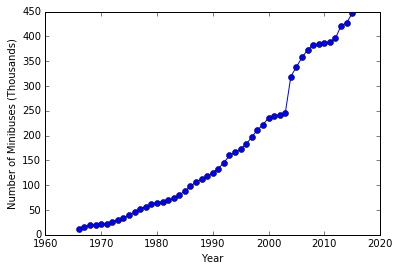

In [4]:
#Amount of Minibuses
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Minibus[0:]).T/1000

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Minibuses (Thousands)')

plt.show()

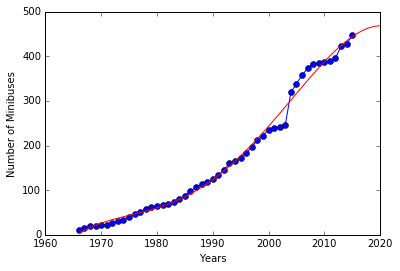

In [5]:
# Setup the vandermonde matrix
N = len(x)

#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Minibuses')

plt.show()

In [6]:
#Number of Minibuses in 2016
f[45]

matrix([[ 448.89804661]])

In [7]:
#Number of Minibuses in 2017
f[46]

matrix([[ 456.78690229]])

In [8]:
#Number of Minibuses in 2018
f[47]

matrix([[ 462.83784132]])

In [9]:
#Number of Minibuses in 2019
f[48]

matrix([[ 466.83600546]])

In [10]:
#Number of Minibuses in 2020
f[49]

matrix([[ 468.5579418]])

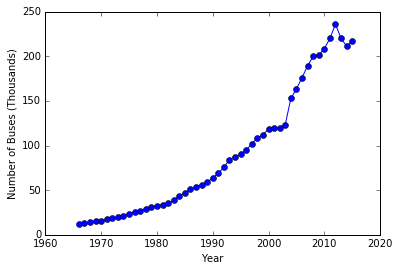

In [11]:
#Amount of Buses
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Bus[0:]).T/1000

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Buses (Thousands)')

plt.show()

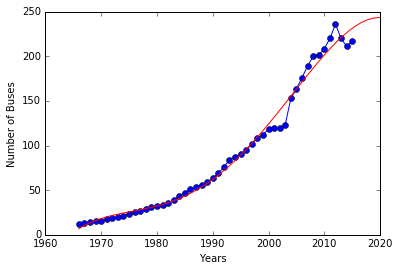

In [12]:
# Setup the vandermonde matrix
N = len(x)

#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Buses')

plt.show()

In [13]:
#Number of Buses in 2016
f[45]

matrix([[ 233.902934]])

In [14]:
#Number of Buses in 2017
f[46]

matrix([[ 237.97014089]])

In [15]:
#Number of Buses in 2018
f[47]

matrix([[ 241.00351114]])

In [16]:
#Number of Buses in 2019
f[48]

matrix([[ 242.88036387]])

In [17]:
#Number of Buses in 2020
f[49]

matrix([[ 243.47306795]])

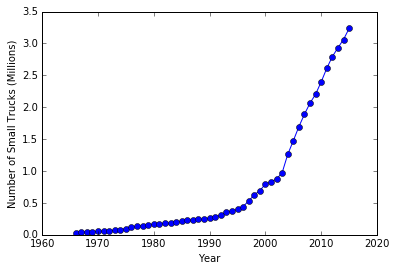

In [21]:
#Amount of Smalltrucks
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.SmallTruck[0:]).T/1000000

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Small Trucks (Millions)')

plt.show()

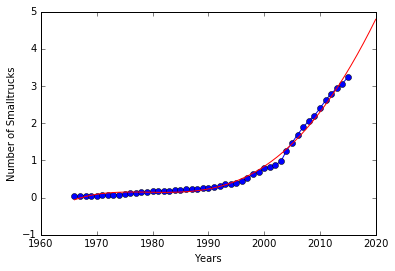

In [22]:
# Setup the vandermonde matrix
N = len(x)

#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Smalltrucks')

plt.show()

In [23]:
#Number of Smalltrucks in 2016
f[45]

matrix([[ 3.55990015]])

In [24]:
#Number of Smalltrucks in 2017
f[46]

matrix([[ 3.84867182]])

In [25]:
#Number of Smalltrucks in 2018
f[47]

matrix([[ 4.15071004]])

In [26]:
#Number of Smalltrucks in 2019
f[48]

matrix([[ 4.4660207]])

In [27]:
#Number of Smalltrucks in 2020
f[49]

matrix([[ 4.79458781]])

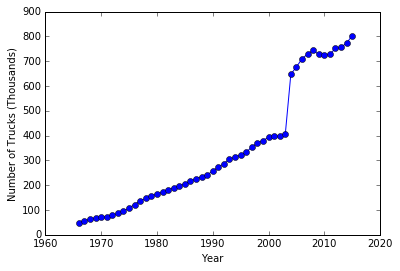

In [28]:
#Amount of Trucks
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Truck[0:]).T/1000

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Trucks (Thousands)')

plt.show()

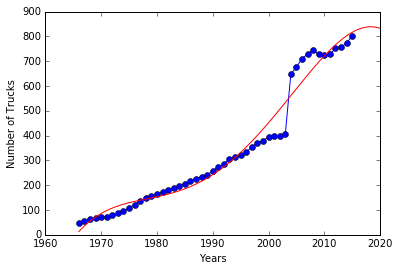

In [29]:
# Setup the vandermonde matrix
N = len(x)

#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Trucks')

plt.show()

In [30]:
#Number of trucks in 2016
f[45]

matrix([[ 823.76275181]])

In [31]:
#Number of trucks in 2017
f[46]

matrix([[ 833.5262518]])

In [32]:
#Number of trucks in 2018
f[47]

matrix([[ 838.67268132]])

In [33]:
#Number of trucks in 2019
f[48]

matrix([[ 838.64945456]])

In [34]:
#Number of trucks in 2020
f[49]

matrix([[ 832.88058656]])

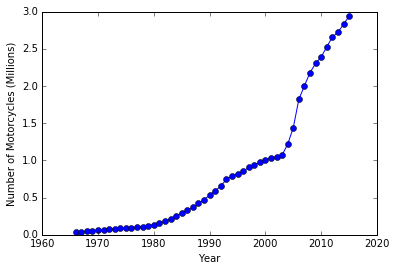

In [36]:
#Amount of Motorcycles
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Motorcycle[0:]).T/1000000

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Motorcycles (Millions)')

plt.show()

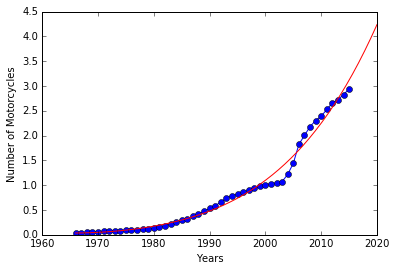

In [37]:
# Setup the vandermonde matrix
N = len(x)

#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Motorcycles')

plt.show()

In [38]:
#Number of Motorcycles in 2016
f[45]

matrix([[ 3.23613084]])

In [39]:
#Number of Motorcycles in 2017
f[46]

matrix([[ 3.46644087]])

In [40]:
#Number of Motorcycles in 2018
f[47]

matrix([[ 3.70985954]])

In [41]:
#Number of Motorcycles in 2019
f[48]

matrix([[ 3.96693206]])

In [42]:
#Number of Motorcycles in 2020
f[49]

matrix([[ 4.23821616]])

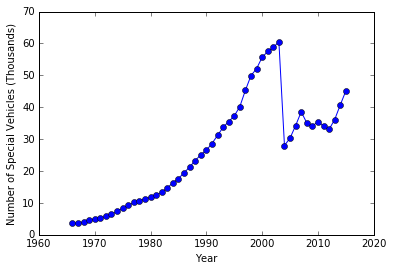

In [43]:
#Amount of Special Vehicles
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.SpecialVehicles[0:]).T/1000

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Special Vehicles (Thousands)')

plt.show()

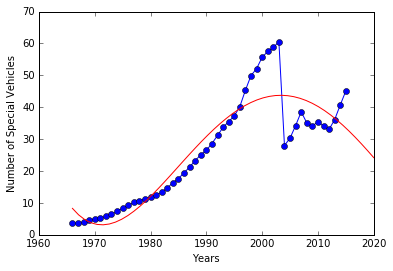

In [44]:
# Setup the vandermonde matrix
N = len(x)

#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Special Vehicles')

plt.show()

In [45]:
#Number of Special Vehicles in 2016
f[45]

matrix([[ 32.49750089]])

In [46]:
#Number of Special Vehicles in 2017
f[46]

matrix([[ 30.558091]])

In [47]:
#Number of Special Vehicles in 2018
f[47]

matrix([[ 28.51645033]])

In [48]:
#Number of Special Vehicles in 2019
f[48]

matrix([[ 26.38889973]])

In [49]:
#Number of Special Vehicles in 2020
f[49]

matrix([[ 24.19309102]])

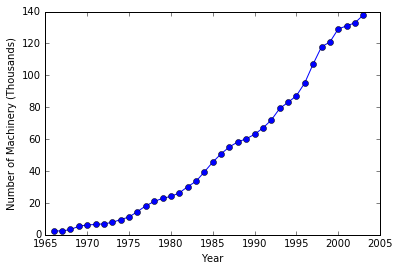

In [50]:
#Amount of Machinery
x = np.matrix(df_arac.Year[0:38]).T-BaseYear
y = np.matrix(df_arac.Machinery[0:38]).T/1000

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Machinery (Thousands)')

plt.show()

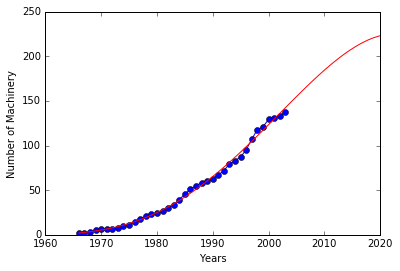

In [51]:
# Setup the vandermonde matrix
N = len(x)

#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Machinery')

plt.show()

In [52]:
#Number of Machineries in 2016
f[45]

matrix([[ 210.824113]])

In [53]:
#Number of Special Vehicles in 2017
f[46]

matrix([[ 214.73814863]])

In [55]:
#Number of Special Vehicles in 2018
f[47]

matrix([[ 218.10778322]])

In [56]:
#Number of Special Vehicles in 2019
f[48]

matrix([[ 220.88064194]])

In [57]:
#Number of Special Vehicles in 2020
f[49]

matrix([[ 223.00271315]])

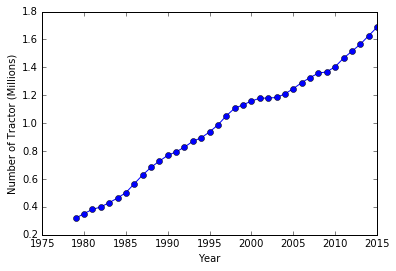

In [58]:
#Amount of Tractor
x = np.matrix(df_arac.Year[13:]).T-BaseYear
y = np.matrix(df_arac.Tractor[13:]).T/1000000

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Tractor (Millions)')

plt.show()

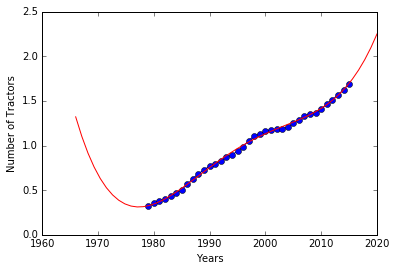

In [59]:
# Setup the vandermonde matrix
N = len(x)

#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Tractors')

plt.show()

In [60]:
#Number of Tractors in 2016
f[45]

matrix([[ 1.74433974]])

In [61]:
#Number of Tractors in 2017
f[46]

matrix([[ 1.84461592]])

In [62]:
#Number of Tractors in 2018
f[47]

matrix([[ 1.96088834]])

In [63]:
#Number of Tractors in 2019
f[48]

matrix([[ 2.09517762]])

In [64]:
#Number of Tractors in 2020
f[49]

matrix([[ 2.24960873]])